In [1]:
import numpy as np 
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
images, labels = (x_train[0:1000].reshape(1000, 28*28) / 255, y_train[0:1000])
images.shape, x_train.shape

((1000, 784), (60000, 28, 28))

In [4]:
one_hot_labels = np.zeros((len(labels), 10))
for i, l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

In [5]:
test_images = x_test.reshape(len(x_test), 28*28)/255
test_labels = np.zeros((len(y_test), 10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1
    

Text(0.5, 1.0, '5')

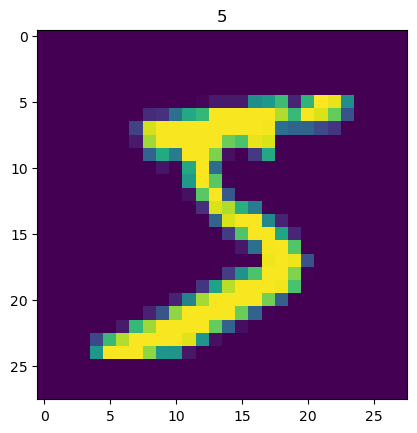

In [6]:
plt.imshow(x_train[0])
plt.title(y_train[0])


In [ ]:
np.random.seed(1)
relu = lambda x:(x >= 0) * x
relu2deriv = lambda x: x >=0

lr = 0.005
iterations = 350
hidden_size = 40
pixels_per_image = 784
num_labels = 10

weight_0_1 = 0.2 * np.random.random((pixels_per_image, hidden_size)) - 0.1
weight_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1


In [13]:
for epoch in range(iterations):
    error = 0.0
    correct_cnt = 0
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(layer_0.dot(weight_0_1))
        layer_2 = layer_1.dot(weight_1_2)
        
        error += np.sum((layer_2 - labels[i])**2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weight_1_2.T)*relu2deriv(layer_1)
        
        weight_1_2 += lr * layer_1.T.dot(layer_2_delta)
        weight_0_1 += lr * layer_0.T.dot(layer_1_delta)
        
    sys.stdout.write("\r"+ \
                        "I:"+str(epoch)+\
                        ", Error:" + str(error/float(len(images)))[0:5] + \
                        ", correct:" + str(correct_cnt/float(len(images))))
        
    if(epoch % 10 == 0 or epoch == iterations - 1):
        error = 0.0
        correct_cnt = 0
        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0, weight_0_1))
            layer_2 = np.dot(layer_1, weight_1_2)
            error += np.sum((test_labels[i:i+1] - layer_2)**2)
            correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
        sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                     " Test-Acc:" + str(correct_cnt/float(len(test_images))))
        print()

I:0, Error:0.106, correct:1.0 Test-Err:0.748 Test-Acc:0.6751
I:10, Error:0.106, correct:1.0 Test-Err:0.748 Test-Acc:0.6746
I:20, Error:0.106, correct:1.0 Test-Err:0.747 Test-Acc:0.6742
I:30, Error:0.106, correct:1.0 Test-Err:0.746 Test-Acc:0.674
I:40, Error:0.106, correct:1.0 Test-Err:0.746 Test-Acc:0.6732
I:50, Error:0.106, correct:1.0 Test-Err:0.745 Test-Acc:0.672
I:60, Error:0.106, correct:1.0 Test-Err:0.745 Test-Acc:0.6712
I:70, Error:0.106, correct:0.999 Test-Err:0.745 Test-Acc:0.6704
I:80, Error:0.106, correct:0.999 Test-Err:0.746 Test-Acc:0.6705
I:90, Error:0.106, correct:0.999 Test-Err:0.746 Test-Acc:0.6699
I:100, Error:0.106, correct:0.999 Test-Err:0.748 Test-Acc:0.6698
I:110, Error:0.106, correct:0.999 Test-Err:0.749 Test-Acc:0.6679
I:120, Error:0.106, correct:0.999 Test-Err:0.750 Test-Acc:0.6665
I:130, Error:0.105, correct:0.999 Test-Err:0.751 Test-Acc:0.6656
I:140, Error:0.104, correct:0.999 Test-Err:0.753 Test-Acc:0.6646
I:150, Error:0.104, correct:0.999 Test-Err:0.755 Tes

In [13]:
# Dropout

for epoch in range(iterations):
    error = 0.0
    correct_cnt = 0
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0, weight_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1, weight_1_2)
        
        
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        
        layer_2_delta = labels[i:i+1] - layer_2
        layer_1_delta = layer_2_delta.dot(weight_1_2.T)*relu2deriv(layer_1)
        layer_1_delta *= dropout_mask
        
        weight_1_2 += lr * layer_1.T.dot(layer_2_delta)
        weight_0_1 += lr * layer_0.T.dot(layer_1_delta)
        
    if(epoch%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weight_0_1))
            layer_2 = np.dot(layer_1, weight_1_2)
            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == \
            np.argmax(test_labels[i:i+1]))
            
        sys.stdout.write("\n" + \
        "I:" + str(epoch) + \
        " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
        " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
        " Train-Err:" + str(error/ float(len(images)))[0:5] +\
        " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.350 Test-Acc:0.8524 Train-Err:0.0 Train-Acc:0.825
I:10 Test-Err:0.339 Test-Acc:0.8538 Train-Err:0.0 Train-Acc:0.829
I:20 Test-Err:0.336 Test-Acc:0.8537 Train-Err:0.0 Train-Acc:0.83
I:30 Test-Err:0.360 Test-Acc:0.8443 Train-Err:0.0 Train-Acc:0.808
I:40 Test-Err:0.384 Test-Acc:0.8318 Train-Err:0.0 Train-Acc:0.836
I:50 Test-Err:0.381 Test-Acc:0.832 Train-Err:0.0 Train-Acc:0.842
I:60 Test-Err:0.397 Test-Acc:0.8102 Train-Err:0.0 Train-Acc:0.822
I:70 Test-Err:0.396 Test-Acc:0.818 Train-Err:0.0 Train-Acc:0.831
I:80 Test-Err:0.397 Test-Acc:0.8089 Train-Err:0.0 Train-Acc:0.832
I:90 Test-Err:0.397 Test-Acc:0.8111 Train-Err:0.0 Train-Acc:0.833
I:100 Test-Err:0.418 Test-Acc:0.7978 Train-Err:0.0 Train-Acc:0.847
I:110 Test-Err:0.421 Test-Acc:0.7951 Train-Err:0.0 Train-Acc:0.821
I:120 Test-Err:0.390 Test-Acc:0.8141 Train-Err:0.0 Train-Acc:0.849
I:130 Test-Err:0.407 Test-Acc:0.8067 Train-Err:0.0 Train-Acc:0.837
I:140 Test-Err:0.397 Test-Acc:0.8042 Train-Err:0.0 Train-Acc:0.841
I:150 Te

In [ ]:
import numpy, sys
np.random.seed(1)
def relu(x):
    return (x >= 0) * x 
def relu2deriv(output):
    return output >= 0
alpha, iterations, hidden_size = (0.005, 300, 100)
pixels_per_image, num_labels = (784, 10)
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1
for j in range(iterations):
    error, correct_cnt = (0.0,0)
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)
        
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
        np.argmax(labels[i:i+1]))
        
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask
        
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        
    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0
 
        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)
            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == \
            np.argmax(test_labels[i:i+1]))
        sys.stdout.write("\n" + \
        "I:" + str(j) + \
        " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
        " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
        " Train-Err:" + str(error/ float(len(images)))[0:5] +\
        " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.641 Test-Acc:0.6333 Train-Err:0.891 Train-Acc:0.413
I:10 Test-Err:0.458 Test-Acc:0.787 Train-Err:0.472 Train-Acc:0.764
I:20 Test-Err:0.415 Test-Acc:0.8133 Train-Err:0.430 Train-Acc:0.809
I:30 Test-Err:0.421 Test-Acc:0.8114 Train-Err:0.415 Train-Acc:0.811
I:40 Test-Err:0.419 Test-Acc:0.8112 Train-Err:0.413 Train-Acc:0.827
I:50 Test-Err:0.409 Test-Acc:0.8133 Train-Err:0.392 Train-Acc:0.836
I:60 Test-Err:0.412 Test-Acc:0.8236 Train-Err:0.402 Train-Acc:0.836
I:70 Test-Err:0.412 Test-Acc:0.8033 Train-Err:0.383 Train-Acc:0.857
I:80 Test-Err:0.410 Test-Acc:0.8054 Train-Err:0.386 Train-Acc:0.854
I:90 Test-Err:0.411 Test-Acc:0.8144 Train-Err:0.376 Train-Acc:0.868
I:100 Test-Err:0.411 Test-Acc:0.7903 Train-Err:0.369 Train-Acc:0.864
I:110 Test-Err:0.411 Test-Acc:0.8003 Train-Err:0.371 Train-Acc:0.868
I:120 Test-Err:0.402 Test-Acc:0.8046 Train-Err:0.353 Train-Acc:0.857
I:130 Test-Err:0.408 Test-Acc:0.8091 Train-Err:0.352 Train-Acc:0.867
I:140 Test-Err:0.405 Test-Acc:0.8083 Train-Er